#Import

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import torch
import torch.nn as nn # neural network
import torch.nn.functional as F
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest, chi2,f_classif,RFE
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



#from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
#precision_score, recall_score, f1_score, roc_curve, roc_auc_score, balanced_accuracy_scor


#Importing Data

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

print("The shape of Train datset is ",df.shape)
print("The shape of Test datset is ",df_test.shape)

#df.head()

The shape of Train datset is  (103904, 25)
The shape of Test datset is  (25976, 25)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.describe(include='all')

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,51951.500000,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,29994.645522,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,0.000000,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,25975.750000,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,51951.500000,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,77927.250000,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [6]:
# Checking for duplicates
df.duplicated().sum()

# There are no duplicates in dataset

0

In [7]:
#Checking for null Values
df.isnull().sum()
#There are 310 null values in arrival delay in minutes

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
#Target Variable satisfaction

#  There are two types of output variables 'neutral or dissatisfied  mapped to 0 and 'satisfied' mapped to 1
print('The distribution of output variable is ')

print(df['satisfaction'].value_counts())

# #We observe the dataset is balnced hence there is no need to balance the dataset
df['satisfaction'] =df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

The distribution of output variable is 
neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


In [9]:
#Dropping the xtra columns
#df.drop(columns = ['id','Unnamed: 0','satisfaction'],inplace = True)
df.drop(columns = ['id','Unnamed: 0'],inplace = True)
print("The shape of datset is ",df.shape)

The shape of datset is  (103904, 23)


#EDA

## Using Pandas Profiling

In [ ]:
# pip install pandas-profiling

In [ ]:
#Pandas Profiling
df = pd.read_csv("train.csv")
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

#Numerical Feature

<AxesSubplot:>

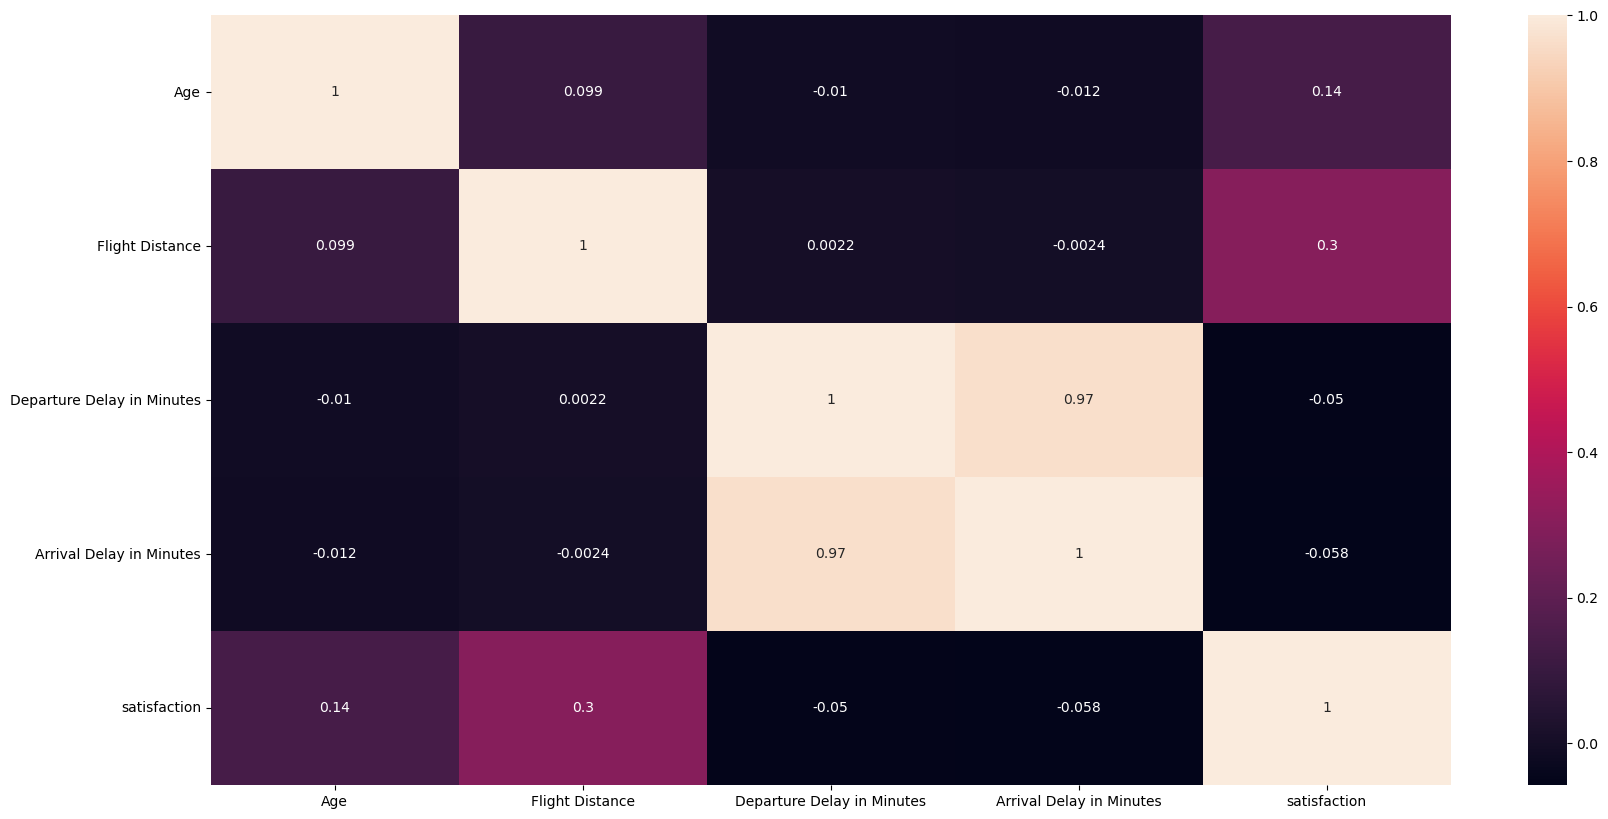

In [10]:
num =['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']
df_num = df[num]
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(),annot=True)

In [11]:
# Since the  'Departure Delay in Minutes', 'Arrival Delay in Minutes' are highle correlated we can remove Arrival delay in minutes
# Hence it will solve the problme of duplicated

df.drop(columns = ['Arrival Delay in Minutes'],inplace = True)
len(df_num.columns)

5

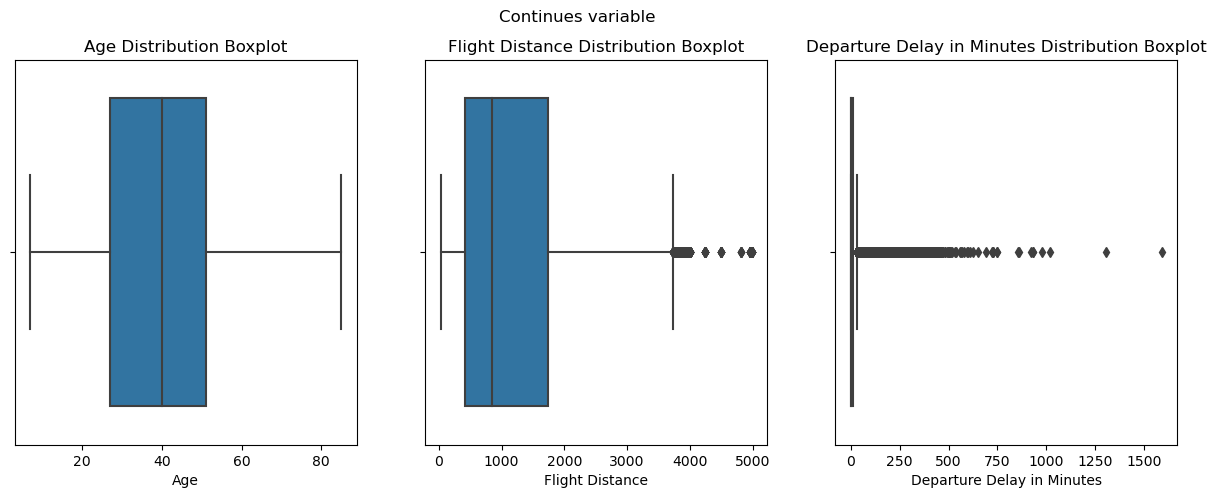

In [12]:
# We need to check for outlier for Age, Flight distance, and Departure Delay in Minutes 

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Continues variable')


#create boxplot in each subplot
sns.boxplot( x=df_num['Age'], ax=axes[0])
axes[0].set_title("Age Distribution Boxplot" )

sns.boxplot( x=df_num['Flight Distance'], ax=axes[1])
axes[1].set_title('Flight Distance Distribution Boxplot')

sns.boxplot( x=df_num['Departure Delay in Minutes'], ax=axes[2])
axes[2].set_title('Departure Delay in Minutes Distribution Boxplot')


plt.show()
# obs: age has not outlier as for flight distance we will remove values > 4000 and departure in delay 300 min ie 1 hours

In [13]:
# Removing the departure delay values which are less than 60
df = df[(df['Departure Delay in Minutes']  < 60) & (df['Flight Distance'] < 4000)]
df.shape

#The flight distance is skewed so we use log transform to convert it
#df['Flight Distance'] = np.log1p(df['Flight Distance'])

(96446, 22)

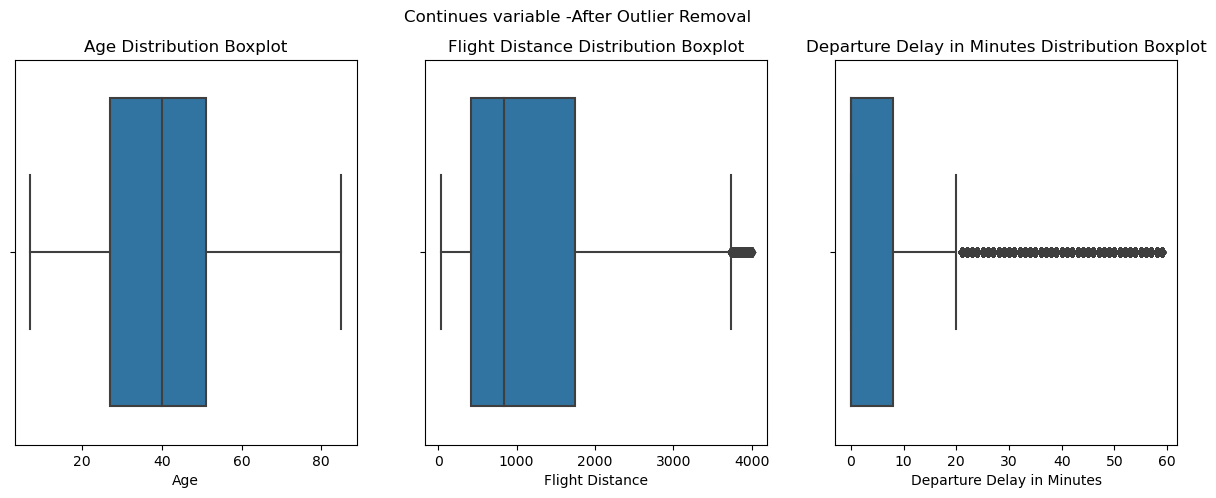

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Continues variable -After Outlier Removal')


#create boxplot in each subplot
sns.boxplot( x=df['Age'], ax=axes[0])
axes[0].set_title("Age Distribution Boxplot" )

sns.boxplot( x=df['Flight Distance'], ax=axes[1])
axes[1].set_title('Flight Distance Distribution Boxplot')

sns.boxplot( x=df['Departure Delay in Minutes'], ax=axes[2])
axes[2].set_title('Departure Delay in Minutes Distribution Boxplot')


plt.show()

Text(0.5, 1.0, 'Departure Delay in Minutes Distribution Boxplot')

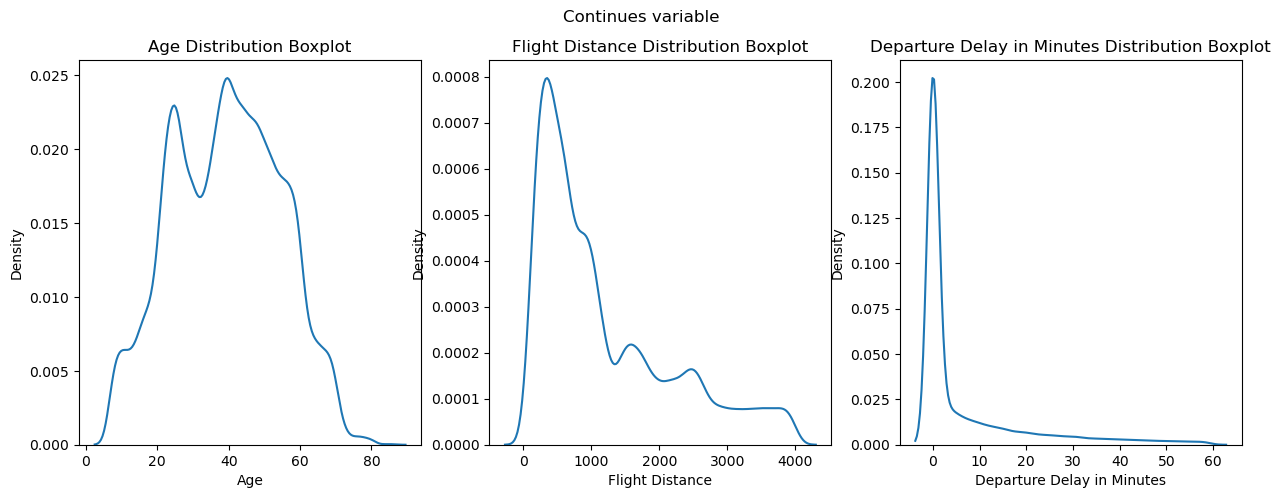

In [15]:
# Checking for distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Continues variable')


#create boxplot in each subplot
sns.kdeplot( x=df['Age'], ax=axes[0])
axes[0].set_title("Age Distribution Boxplot" )

sns.kdeplot( x=df['Flight Distance'], ax=axes[1])
axes[1].set_title('Flight Distance Distribution Boxplot')

sns.kdeplot( x=df['Departure Delay in Minutes'], ax=axes[2])
axes[2].set_title('Departure Delay in Minutes Distribution Boxplot')

In [16]:
#After Explotory Data Analysis and Cleaning we have our final data ready for feature Engeinring

print('The shape of data after cleaning is ',df.shape)

The shape of data after cleaning is  (96446, 22)


#Categorical feature

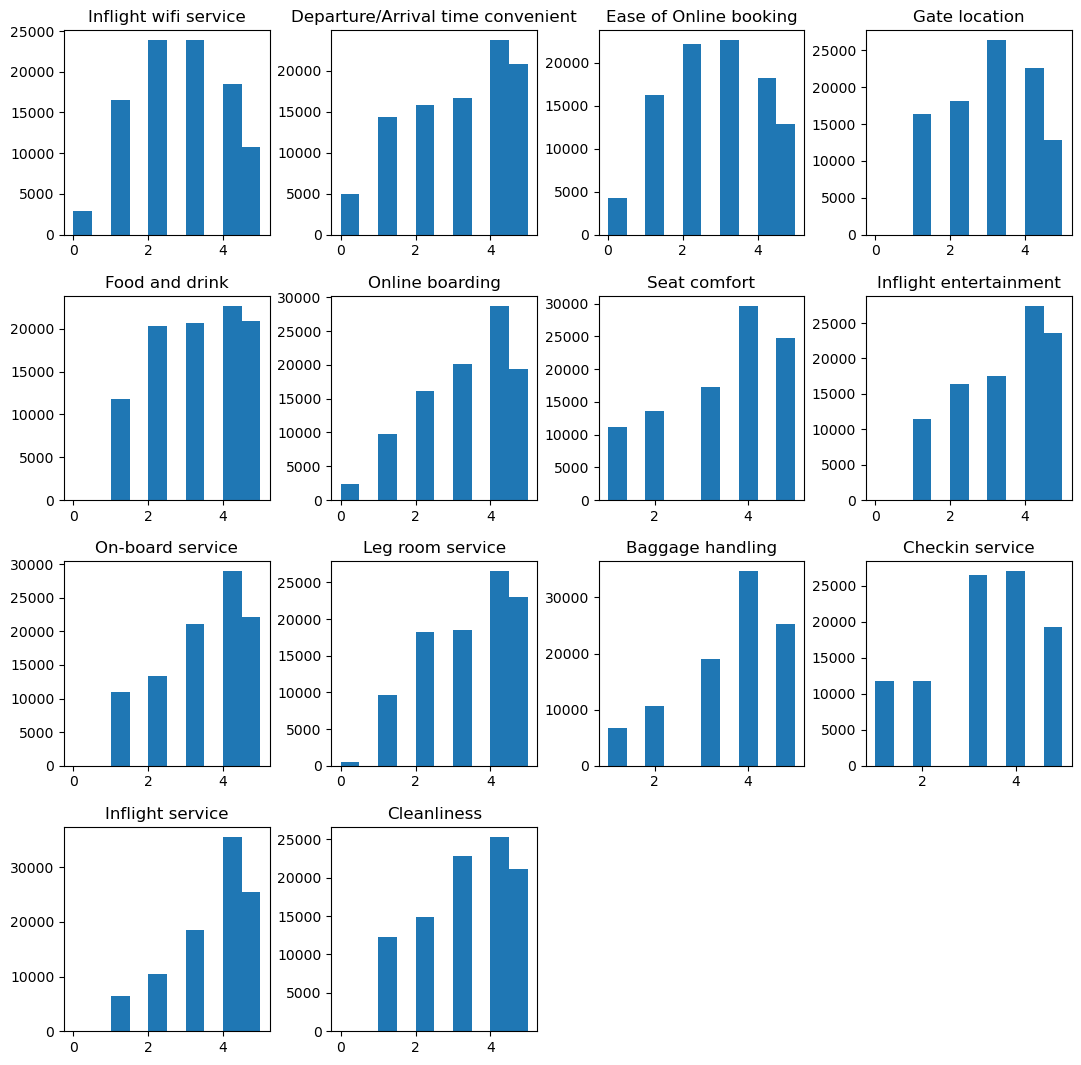

In [17]:
#Separting the  categorical variables
num =['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']

#Removint the numerical data
df_ord = df.loc[:, ~df.columns.isin(num)]
df_ord.shape

df_ord.hist(grid = False,figsize= (13,13))
plt.show()
# we observe 2 types review numbers and pure categorical columns

In [18]:
df['Inflight wifi service'].value_counts()

3    23895
2    23860
4    18487
1    16483
5    10782
0     2939
Name: Inflight wifi service, dtype: int64

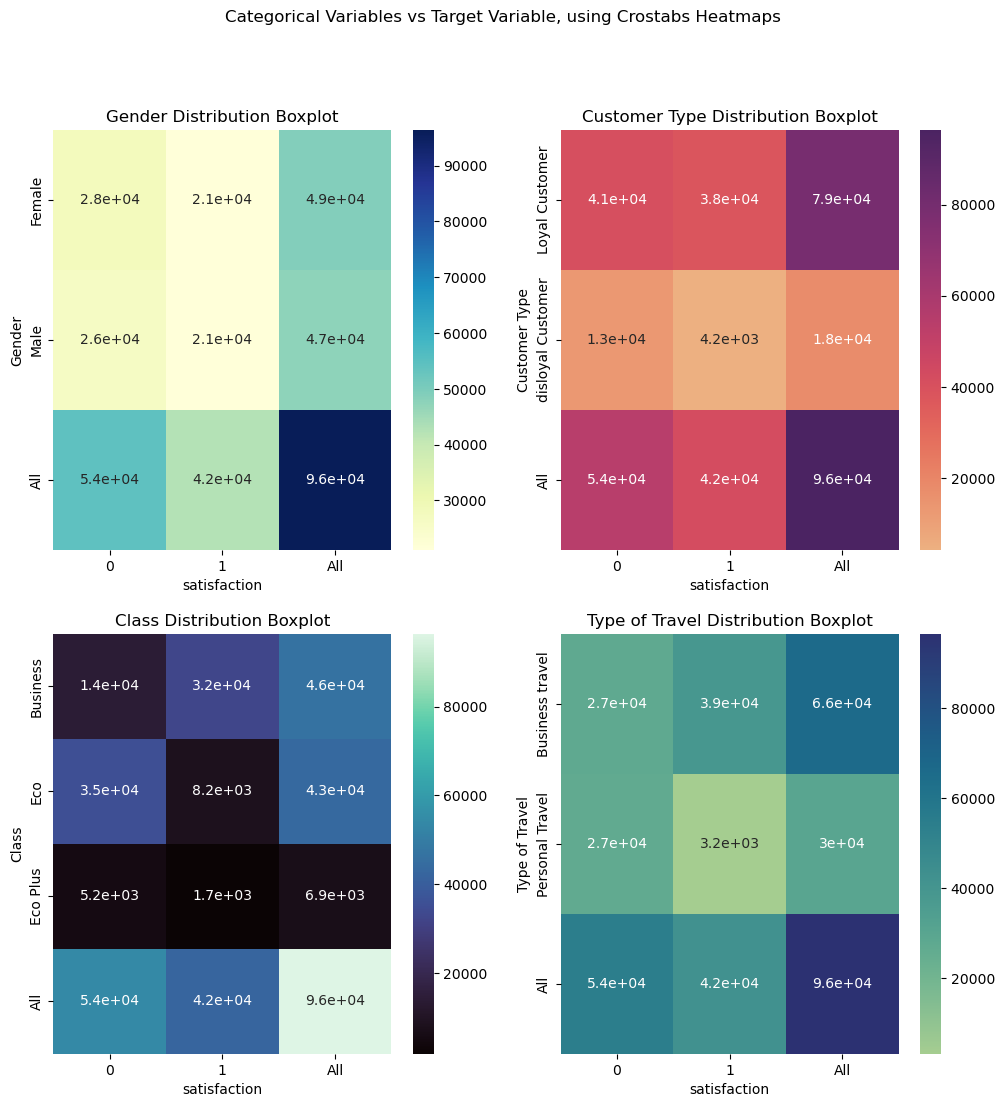

In [19]:
#For pure nominal Data
fig, axes = plt.subplots(2, 2, figsize=(12,12 ))
fig.suptitle('Categorical Variables vs Target Variable, using Crostabs Heatmaps')


#create boxplot in each subplot
sns.heatmap(pd.crosstab(df['Gender'],df['satisfaction'], margins=True, values=df['satisfaction'], aggfunc=pd.Series.count),
            cmap="YlGnBu", annot=True, ax = axes[0,0])
# sns.boxplot( x=df_cor['Age'], ax=axes[0,0])
axes[0,0].set_title("Gender Distribution Boxplot" )


#create boxplot in each subplot
sns.heatmap(pd.crosstab(df['Customer Type'],df['satisfaction'], margins=True, values=df['satisfaction'], aggfunc=pd.Series.count),
            cmap="flare", annot=True, ax = axes[0,1])
# sns.boxplot( x=df_cor['Age'], ax=axes[0,0])
axes[0,1].set_title("Customer Type Distribution Boxplot" )


#create boxplot in each subplot
sns.heatmap(pd.crosstab(df['Class'],df['satisfaction'], margins=True, values=df['satisfaction'], aggfunc=pd.Series.count),
            cmap="mako", annot=True ,ax = axes[1,0])
# sns.boxplot( x=df_cor['Age'], ax=axes[0,0])
axes[1,0].set_title("Class Distribution Boxplot" )


#create boxplot in each subplot
sns.heatmap(pd.crosstab(df['Type of Travel'],df['satisfaction'], margins=True, values=df['satisfaction'], aggfunc=pd.Series.count),
            cmap="crest", annot=True,ax = axes[1,1])
# sns.boxplot( x=df_cor['Age'], ax=axes[0,0])
axes[1,1].set_title("Type of Travel Distribution Boxplot" )



plt.show()
#Obs
#For Gender there is no bias for satisfaction as the male female heatmaps are similar
#A customer who is loyal has more expectations from the flight if is not as per standrads he is 75% more likely to leave a 0 
#Passengers in Economy class leave a 0 as compared other two classes
# Passenegr who travels by BUssines class belongs  80% of satisfied custoemrs
# Type of travel has no effect on dis satisfaction, on the Contarry When people travel by Bussines travel reason  class they 95% 
#more satisfied then fellow paasengers traveling in personal travle reason

In [20]:
df.shape

(96446, 22)

#Conclusion of EDA
There are total 21  Independent features
 - 3 are numerical
 - 18 Categorical 
  - 14 are ordinal  ( Review 1 is least 5 is most)
  - 4 are nominal 

- We observed there in numerical there are two columsn with high coreelation we drop 1 column

- In ordinal feature we observe there is 0 which is considered is null we impute it to 3 as it equal to no answer 

#Feature Engineering

In [21]:
df.shape

(96446, 22)

In [22]:
y = df['satisfaction']
df.drop(columns = ['satisfaction'],inplace = True)
df.shape

#As the there ar values we replace the values of 0 with mean as it is review
df = df.replace(0,3)
df.shape

(96446, 21)

In [23]:
#Test Dataset
df_test = pd.read_csv('test.csv')
print("Shape of test",df_test.shape)

df_test['satisfaction'] =df_test['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

y_ts = df_test['satisfaction']
df_test.drop(columns = ['satisfaction','Unnamed: 0', 'id','Arrival Delay in Minutes'],inplace = True)

df_test = df_test.replace(0,3)
print("The shape of data is ",df_test.shape)

Shape of test (25976, 25)
The shape of data is  (25976, 21)


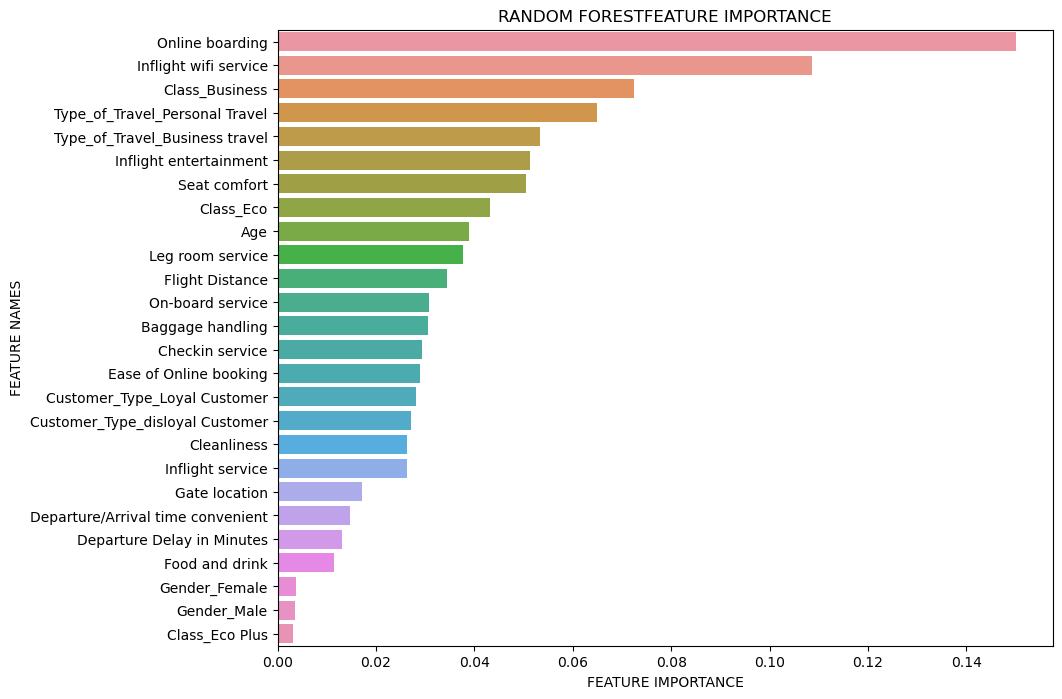

In [24]:
#Feature IMportance Using Random Forest
df_fi = df.copy()
df_fi = pd.concat([df_fi,pd.get_dummies(df_fi['Gender'], prefix='Gender')],axis=1)

df_fi = pd.concat([df_fi,pd.get_dummies(df_fi['Customer Type'], prefix='Customer_Type')],axis=1)

df_fi = pd.concat([df_fi,pd.get_dummies(df_fi['Type of Travel'], prefix='Type_of_Travel')],axis=1)

df_fi = pd.concat([df_fi,pd.get_dummies(df_fi['Class'], prefix='Class')],axis=1)

df_fi.drop(columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class'],inplace = True)
model = RandomForestClassifier()
model.fit(df_fi,y)
#y_pred = model.predict(X_ts)
#print(accuracy_score(y_pred,y_ts))


X = pd.DataFrame(df_fi)
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')


plot_feature_importance(model.feature_importances_,X.columns,'RANDOM FOREST')

# Feature Enginering Results
Feature Importance is calculated using Random Forest discard:
- Gate location
- Departure/Arrival time convenient
- Food and Drink
- Gender
- Departure Delay in Minutes

now final data is of 

In [25]:
#Seprating the numerical and categorical columns 

#Numerical columns
num = [ 'Age','Flight Distance', 'Inflight wifi service', 'Ease of Online booking','Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness']

df_num_train = df[num]

df_num_test = df_test[num]

scaler = StandardScaler()
df_num_train = pd.DataFrame(scaler.fit_transform(df_num_train)).to_numpy()
df_num_test = pd.DataFrame(scaler.transform(df_num_test)).to_numpy()

print("The shape of train num data",df_num_train.shape)
print("The shape of test num data",df_num_test.shape)

The shape of train num data (96446, 13)
The shape of test num data (25976, 13)


In [26]:
# Ordinal Features
ordi = ['Customer Type', 'Type of Travel', 'Class']


df_ord_train = df[ordi]
df_ord_test = df_test[ordi]

scaler = OneHotEncoder()
df_ord_train = scaler.fit_transform(df_ord_train).toarray()
df_ord_test = scaler.transform(df_ord_test).toarray()

print("The shape of train ordinal data",df_ord_train.shape)
print("The shape of test ordinal data",df_ord_test.shape)

The shape of train ordinal data (96446, 7)
The shape of test ordinal data (25976, 7)


In [27]:
# # Nominal Features
# nom = ['Customer Type', 'Type of Travel', 'Class']

# df_nom_train = df[nom]
# df_nom_test = df_test[nom]

# scaler = OneHotEncoder()
# df_nom_train = scaler.fit_transform(df_nom_train).toarray()
# df_nom_test = scaler.transform(df_nom_test).toarray()

# print("The shape of train nominal data",df_nom_train.shape)
# print("The shape of test nominal data",df_nom_test.shape)

In [ ]:
df_train = np.concatenate((df_num_train,df_ord_train,df_nom_train),axis = 1)
df_test = np.concatenate((df_num_test,df_ord_test,df_nom_test),axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size = 0.2, random_state = 87,stratify=y)

print('For validation')
print('The shape of X train  set is ',X_train.shape)
print('The shape of y train set is ',y_train.shape)
print('The shape of X test set is ',X_test.shape)
print('The shape of Y test set is ',y_test.shape)

print('***************************************************')

print('For Testing the Final Machine Learning Model')
print('The shape of X test set is ',df_test.shape)
print('The shape of Y test set is ',y_ts.shape)


# Feature Enginering Results
Feature Importance is calculated using Random Forest having Top 3
 - Online Borading
- In flight Wifi Service
- In Flight service 

now final data is of 

#Machine Learning Modeling and Hyperparametrs Tuning

In [ ]:
#K-nearest neighbor with Cross Validation
from tqdm import tqdm
acc = []
for i in tqdm(range(1,30)):

  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc.append(1- accuracy_score(y_pred,y_test))
  
plt.plot(list(range(1,30)), acc)
plt.xticks(range(1, 30))
plt.show()

In [ ]:
#2. AdaBoost Classifier

model = AdaBoostClassifier()
model.fit(df_train,y)

param = {"n_estimators":[10, 50, 100, 500, 1000], }

grid = GridSearchCV( model,param_grid = param, cv = 10,verbose = 1,n_jobs =-1)
grid.fit(df_train,y)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


In [ ]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()

param = {"n_estimators":[10, 50, 100, 500, 1000], }

grid = GridSearchCV( model,param_grid = param, cv = 10,verbose = 1,n_jobs =-1)
grid.fit(df_train,y)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

In [ ]:
6. #Logistic Regression with Cross Validation

model = LogisticRegression()
param = {"solver" : ['newton-cg', 'lbfgs', 'liblinear'],
"penalty" :['l2'],
"C" : [100, 10, 1.0, 0.1, 0.01],}

grid = GridSearchCV( model,param_grid = param, cv = 10,verbose = 1,n_jobs =-1)
grid.fit(df_train,y)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


In [ ]:

#7. Random Forest with Cross Validation

from sklearn.ensemble import RandomForestClassifier
#Decision Trees
model = RandomForestClassifier()
model.fit(df_train,y)

param = {"criterion":['gini','impurity'], 
         "max_depth" : range(1,10),
         "min_samples_leaf":range(1,10,2),
         "max_leaf_nodes" : range(1,10,2)}


grid = GridSearchCV( model,param_grid = param, cv = 10,verbose = 1,n_jobs =-1)
grid.fit(df_train,y)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

In [ ]:

#8. Support Vector Machine with Cross Validation
from sklearn.svm import SVC

model = SVC()
param = {"kernel" : ['poly', 'rbf', 'sigmoid'],
"C" : [50, 10, 1.0, 0.1, 0.01],
"gamma" : ['scale']}
# define grid search

grid = GridSearchCV( model,param_grid = param, cv = 10,verbose = 1,n_jobs =-1)
grid.fit(df_train,y)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


In [ ]:
#XGBClassifier


model = XGBClassifier()
param = {"n_estimators" : [10, 100, 1000],
"learning_rate" :[0.001, 0.01, 0.1],
"subsample" :[0.5, 0.7, 1.0],
"max_depth" : [3, 7, 9]}

grid = GridSearchCV( model,param_grid = param, cv = 10,verbose = 1,n_jobs =-1)
grid.fit(df_train,y)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

In [ ]:
#GradientBoostingClassifier

model = GradientBoostingClassifier()
param = {"n_estimators" : [10, 100, 1000],
"learning_rate" :[0.001, 0.01, 0.1],
"subsample" :[0.5, 0.7, 1.0],
"max_depth" : [3, 7, 9]}


grid = GridSearchCV( model,param_grid = param, cv = 10,verbose = 1,n_jobs =-1)
grid.fit(df_train,y)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

In [ ]:
# ADD the ANN code Here
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
NN_Classifier = model.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=15,
                          validation_data=(X_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix
y_pred=(model.predict(df_test) > 0.5).astype(int)   

print(classification_report(y_ts, y_pred))

In [ ]:
model.fit(X_train,y_train,shuffle=True,epochs=50,batch_size=128)